In [1]:
import rlssm
import pandas as pd
import os

/Users/Khamir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)


data = data[data.participant < 5].reset_index(drop=True)

data['block_label'] += 1

data

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0
1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0
2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0
3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0
4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0
...,...,...,...,...,...,...,...,...,...,...
953,4,3.0,75.0,51.0,44.0,3,1,37.0,1.396425,1.0
954,4,3.0,76.0,57.0,33.0,3,1,38.0,1.208049,1.0
955,4,3.0,77.0,42.0,30.0,3,1,39.0,1.276406,1.0
956,4,3.0,78.0,41.0,42.0,2,1,38.5,1.530143,0.0


In [3]:
model = rlssm.RLLBAModel_2A(2,
                           separate_learning_rates=True,
                           nonlinear_mapping=True)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0fb2bb51bfa51dd200d9ec4ee92cb88c NOW.


In [4]:
model.family, model.model_label, model.hierarchical_levels

('RLLBA_2A', 'hierRLLBA_2A_2lr_nonlin', 2)

### Fit

In [5]:
# sampling parameters
n_iter = 700
n_chains = 2
n_thin = 5

# learning parameters
K = 4 # n options
initial_value_learning = 17.5 # intitial value (Q0)


In [6]:
model_fit = model.fit(data,
                    K,
                    initial_value_learning,
                    thin = n_thin,
                    iter = n_iter,
                    chains = n_chains,
                    print_diagnostics = False)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


#### Get Rhat

In [7]:
model_fit.rhat.describe()

,rhat
count,42.000000
mean,1.005555
std,0.013878
min,0.986226
25%,0.994396
50%,1.003811
75%,1.014709
max,1.050946


In [8]:
model_fit.rhat.head()

,rhat,variable
0,1.005682,mu_k
1,1.020226,mu_A
2,0.988785,mu_tau
3,0.989849,mu_utility
4,1.019746,mu_alpha_pos


#### Calculate wAIC

In [9]:
model_fit.waic

{'lppd': -643.8819576260746,
 'p_waic': 16.690083096837167,
 'waic': 1321.1440814458235,
 'waic_se': 70.65677993547321}

#### Check divergences

#### Get posteriors

In [10]:
model_fit.samples

,chain,draw,transf_mu_k,transf_mu_A,transf_mu_tau,transf_mu_utility,transf_mu_alpha_pos,transf_mu_alpha_neg,transf_mu_drift_scaling,k_sbj[1],...,alpha_pos_sbj[3],alpha_pos_sbj[4],alpha_neg_sbj[1],alpha_neg_sbj[2],alpha_neg_sbj[3],alpha_neg_sbj[4],drift_scaling_sbj[1],drift_scaling_sbj[2],drift_scaling_sbj[3],drift_scaling_sbj[4]
0,0,9,2.218216,0.746467,0.485235,0.693135,0.394405,0.476540,0.345808,2.226319,...,0.430719,0.516551,0.465420,0.472362,0.473114,0.457863,0.148265,0.353958,0.232933,0.070899
1,0,52,2.842658,0.735826,0.287528,0.612379,0.263671,0.644251,0.289795,3.003439,...,0.240302,0.244487,0.640299,0.645579,0.641937,0.661543,0.296683,0.276875,0.330955,0.267026
2,0,57,2.731579,0.678422,0.336908,0.669535,0.172269,0.810516,0.193189,2.601803,...,0.173695,0.199894,0.819343,0.785726,0.803066,0.809337,0.223272,0.209809,0.217731,0.163061
3,0,41,2.791303,0.790856,0.334079,0.668357,0.219365,0.816318,0.183288,2.873633,...,0.196379,0.177374,0.800013,0.791071,0.785466,0.794383,0.161155,0.643886,0.131647,0.075777
4,0,17,1.633822,0.661593,0.226324,0.630948,0.372523,0.331318,0.255643,3.436688,...,0.344104,0.362389,0.307234,0.324162,0.312601,0.331165,0.266758,0.240318,0.269478,0.223147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1,19,2.497554,0.674339,0.159015,0.675060,0.228589,0.894061,0.143674,2.626628,...,0.177725,0.208053,0.895406,0.909279,0.893039,0.885036,0.172320,0.295264,0.195957,0.247374
136,1,29,3.203971,0.694095,0.204260,0.590805,0.325917,0.317780,0.262920,3.201770,...,0.266247,0.324119,0.341559,0.313943,0.321068,0.344810,0.201104,0.385478,0.341611,0.190098
137,1,24,2.957967,0.695074,0.356387,0.658315,0.522327,0.359127,0.266369,2.954014,...,0.560326,0.535251,0.349920,0.346014,0.358318,0.370704,0.221486,0.283460,0.230941,0.135635
138,1,22,2.132214,0.731655,0.365446,0.692880,0.228873,0.669432,0.235406,2.133542,...,0.194908,0.202080,0.728476,0.628200,0.686748,0.667976,0.174453,0.178791,0.184725,0.160846


In [11]:
model_fit.trial_samples

OrderedDict([('k_t',
              array([[2.22631866, 2.22631866, 2.22631866, ..., 2.24364107, 2.24364107,
                      2.24364107],
                     [3.0034394 , 3.0034394 , 3.0034394 , ..., 2.94278496, 2.94278496,
                      2.94278496],
                     [2.60180312, 2.60180312, 2.60180312, ..., 2.72707088, 2.72707088,
                      2.72707088],
                     ...,
                     [2.9540138 , 2.9540138 , 2.9540138 , ..., 2.93860169, 2.93860169,
                      2.93860169],
                     [2.13354218, 2.13354218, 2.13354218, ..., 2.26137879, 2.26137879,
                      2.26137879],
                     [2.73086168, 2.73086168, 2.73086168, ..., 2.68258776, 2.68258776,
                      2.68258776]])),
             ('A_t',
              array([[0.52577251, 0.52577251, 0.52577251, ..., 0.98918845, 0.98918845,
                      0.98918845],
                     [0.69960155, 0.69960155, 0.69960155, ..., 1.40385502, 

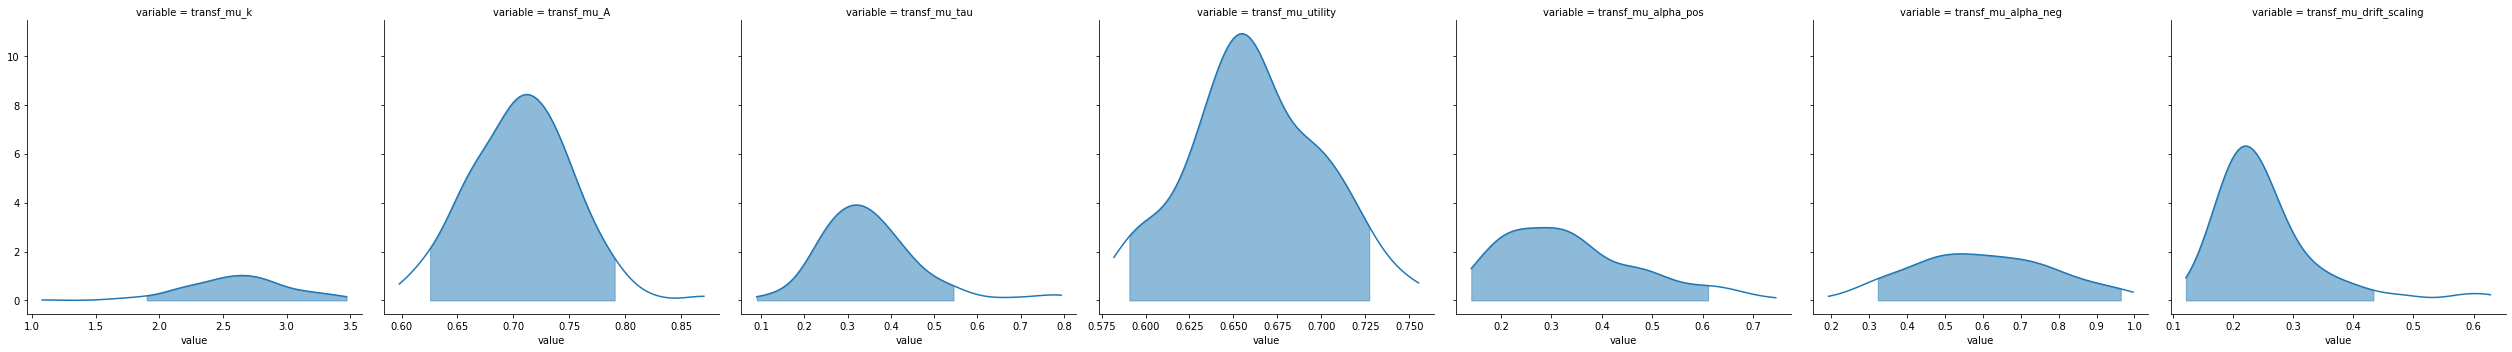

In [12]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

### Posterior predictives

In [13]:
import numpy as np
import seaborn as sns

In [14]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [15]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0,2,AB,1
1,1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0,1,CD,1
2,2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0,2,BD,1
3,3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0,2,CD,1
4,4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0,1,CD,1


#### Ungrouped posterior predictives:

In [16]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)

pp.head()

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.476054  4.501933  1.146258  1.608569  1.518163  1.086897   
2         4.810980  1.350788  1.652765  1.293510  1.391421  1.094286   
3         2.492401  1.439167  2.839662  2.208994  1.928259  1.769389   
4         6.737038  1.899349  1.768718  1.314249  0.965805  1.088841   
5         4.531547  1.863836  1.693630  1.539494  1.599149  1.443646   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      949  950  951  952   
sample                                            ...                           
1         1.088283  1.378473  1.008067  1.330888  ...      1.0  1.0  1.0  1.0   
2         1.321991  1.814132  1.124208  1.266980  ...      0.0  1.0  0.0  1.0   
3         1.553615  1.634681  1.079522  1.463810  ...      1.0  1.0  0.0  1.0   
4         1.236726  1.249866  1.482060  1.119628  ...      1.0  0.0  0.0  1.0   
5         1.412527  1.686905  1.338063  1.422913  ...      1.0  0.0  0.0  1.0   

variable                                
trial     953  954  955  956  957  958  
sample                                  
1         1.0  0.0  0.0  1.0  1.0  1.0  
2         1.0  1.0  0.0  1.0  1.0  1.0  
3         1.0  1.0  1.0  1.0  0.0  1.0  
4         1.0  1.0  1.0  1.0  0.0  1.0  
5         1.0  1.0  1.0  0.0  1.0  1.0  

[5 rows x 1916 columns]

#### Grouped posterior predictives:

In [17]:
pp_grouped = model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['choice_pair', 'block_bins'], 
                                                                 n_posterior_predictives=100)

In [18]:
pp_grouped.head()

mean_accuracy   mean_rt  skewness  \
choice_pair block_bins sample                                      
AB          1          1            0.482759  1.771073  2.595744   
                       2            0.689655  1.408442  0.727124   
                       3            0.413793  1.901473  1.980196   
                       4            0.655172  1.876607  2.016689   
                       5            0.448276  1.578761  0.986869   

                               quant_10_rt_incorrect  quant_10_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    1.160566             1.040399   
                       2                    0.965731             1.072327   
                       3                    0.959460             1.485412   
                       4                    1.134736             1.036091   
                       5                    1.211548             1.087808   

                               quant_30_rt_incorrect  quant_30_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    1.222528             1.168553   
                       2                    1.181709             1.203693   
                       3                    1.359451             1.639556   
                       4                    1.181817             1.143421   
                       5                    1.500704             1.123081   

                               quant_50_rt_incorrect  quant_50_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    1.605475             1.275907   
                       2                    1.213450             1.399032   
                       3                    1.538509             1.753198   
                       4                    1.309251             1.551890   
                       5                    1.780765             1.176192   

                               quant_70_rt_incorrect  quant_70_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    1.750383             1.419784   
                       2                    1.338849             1.617281   
                       3                    1.934357             2.522451   
                       4                    1.539614             1.964199   
                       5                    2.121146             1.304009   

                               quant_90_rt_incorrect  quant_90_rt_correct  
choice_pair block_bins sample                                              
AB          1          1                    3.408895             2.578331  
                       2                    1.690790             1.880986  
                       3                    2.336311             2.751352  
                       4                    2.642390             3.378674  
                       5                    2.486926             1.482917

#### Plot grouped posterior predictives:

/Users/Khamir/DecisionMaking/_Reports/_7/rlssm/rlssm/Race_fits.py:249: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=140
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


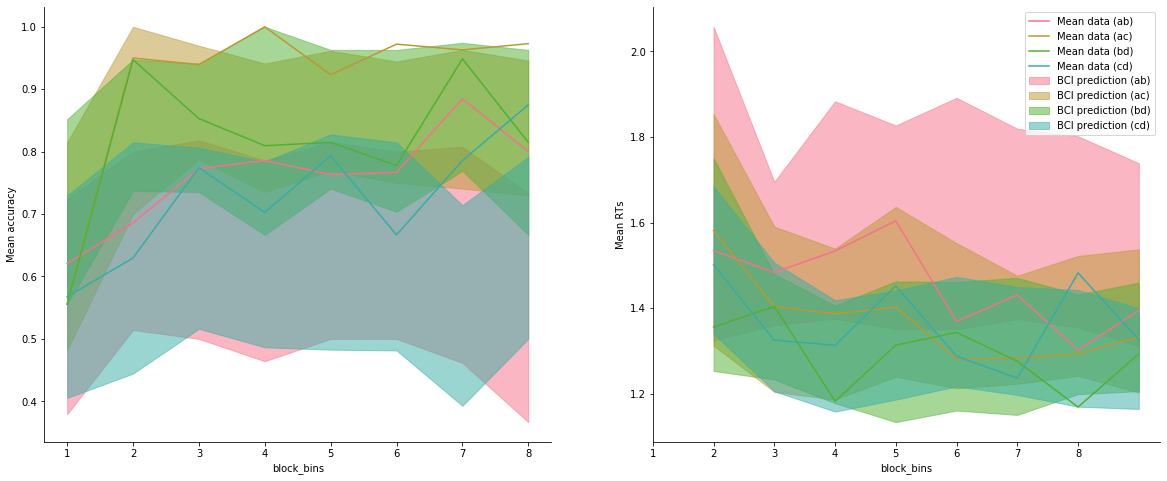

In [19]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins', 'choice_pair'],
    n_posterior_predictives=300,
    figsize=(20,8),
    hue_labels=['ab', 'ac', 'bd', 'cd'],
    hue_order=['AB', 'AC', 'BD', 'CD'],
    palette= sns.color_palette('husl'));

/Users/Khamir/DecisionMaking/_Reports/_7/rlssm/rlssm/Race_fits.py:249: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=140
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


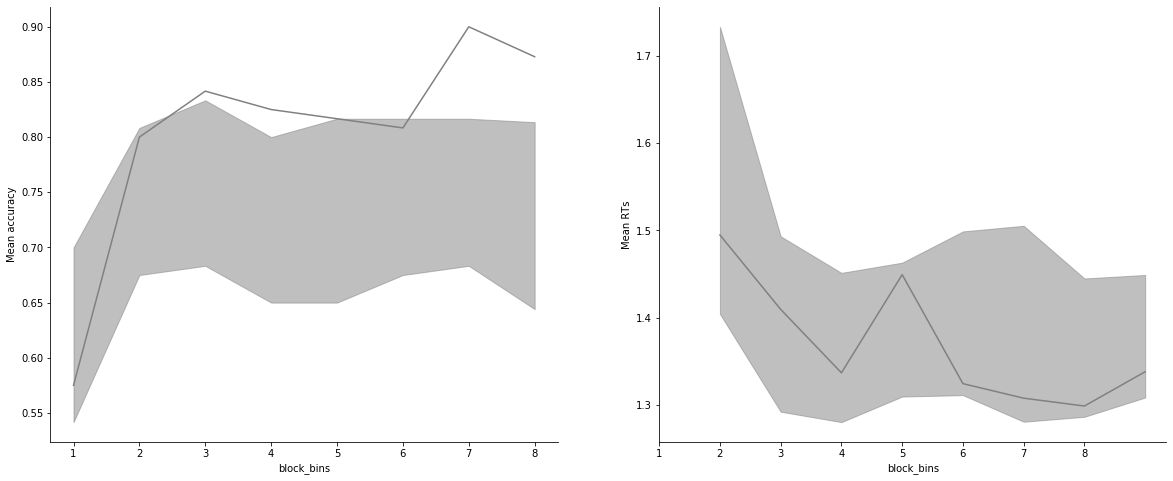

In [20]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins'],
    n_posterior_predictives=300,
    figsize=(20,8));

### Get starting values for further sampling

In [21]:
sv = model_fit.last_values
sv

,chain,draw,warmup,mu_A,mu_alpha_neg,mu_alpha_pos,mu_drift_scaling,mu_k,mu_tau,mu_utility,...,z_k[3],z_k[4],z_tau[1],z_tau[2],z_tau[3],z_tau[4],z_utility[1],z_utility[2],z_utility[3],z_utility[4]
69,0,69,0,-0.024060,-0.366524,-1.074964,-1.128229,3.022115,-1.270109,-0.219801,...,-0.982688,-0.238227,0.429679,-0.340402,1.470062,-0.519064,1.807007,0.045777,1.540086,-1.621073
139,1,69,0,0.053569,0.141450,-0.099692,-1.176579,3.035171,-1.069279,-0.074011,...,0.317727,0.258729,0.273415,-0.804120,0.211012,-0.593435,0.241542,-1.301525,0.138169,-0.837328
